# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 5_Machine Learning Overview and Algorithm

## 2. Decision Trees



**Contents of this note refer to 1) book "Python Machine Learning"; 2) textbook "Data Science from Scratch"; 3) Dr. Robert Michael Lewis's teaching materials at Department of Computer Science, William & Mary; 4) Python toturial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

A decision tree (DT) uses a tree structure to represent a number of possible decision paths and an outcome for each path.

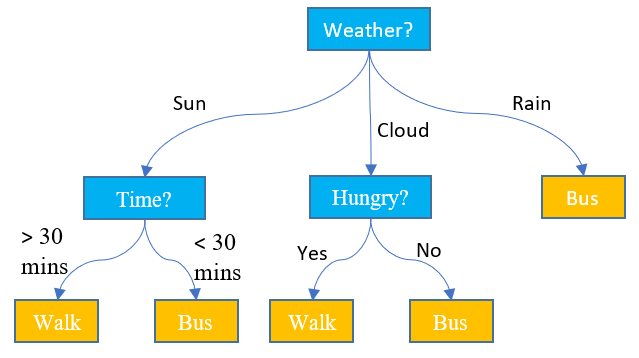

## Characters of decision trees 

Advantages:
- easy to explain
- can be displayed graphically, which makes them easier to understand
- easily handle qualitative variables (e.g. weak and strong for wind)
- arguably reflect human decision making


## Conditions to use DT

In order to use a decision tree as a classifier,
1. There is an **attribute-value** description: all information about each case must be expressible in terms of a fixed set of attributes (e.g., Forecast, Temp).
2. There are **predefined classes**: the categories to which cases are assigned are known (i.e. this is supervised learning).
3. The classes are **disjunctive**: classes must be clearly delineated (i.e. a case either does or does not belong to a particular class).
4. There must be **sufficient training data**: at the very least, there needs to be more samples than classes. More generally, there needs to be sufficient data to distinguish valid patterns from chance coincidences.

# Example

We start with a decision tree that predicts whether we will play tennis given weather conditions.
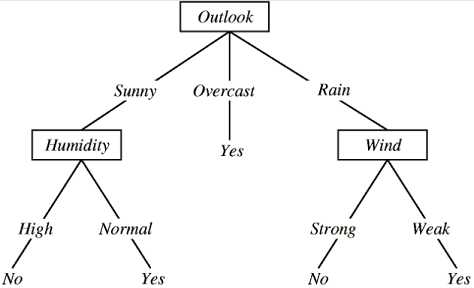




The training set consists of actual instances of our behavior.
<table style="float:left;">
<tr><th>Forecast </th><th>Humidity</th><th>Wind   </th><th>Play?</th></tr>
<tr><td>rain     </td><td>normal  </td><td>strong </td><td>No   </td></tr>
<tr><td>overcast   </td><td>normal  </td><td>strong </td><td>Yes  </td></tr>
<tr><td>sunny   </td><td>high    </td><td>weak   </td><td>No   </td></tr>
<tr><td>sunny   </td><td>normal  </td><td>weak   </td><td>Yes  </td></tr>
<tr><td>rain    </td><td>normal  </td><td>weak   </td><td>Yes  </td></tr>
<tr><td>sunny   </td><td>normal  </td><td>strong </td><td>Yes  </td></tr>
<tr><td>overcast  </td><td>high    </td><td>strong </td><td>Yes  </td></tr>
<tr><td>overcast   </td><td>normal  </td><td>weak   </td><td>Yes  </td></tr>
<tr><td>rain    </td><td>high    </td><td>strong </td><td>No   </td></tr>
</table>

## Constructing a decision tree

Let $T$ be the set of training samples from which we will build the tree, and let $C_{1}, \ldots, C_{K}$ be the classes.
1. $T$ contains one or more samples, all of which belong to a single class $C_{j}$. The decision tree for $T$ is a leaf identifying $C_{j}$.
2. $T$ contains samples that belong to a mixture of classes. In this case, the idea is to refine $T$ into subsets of samples that tend towards single-class collections of samples.
    - Using a single attribute we choose a test with mutually exclusive outcomes $O_{1}, \ldots, O_{N}$, $N > 1$.
    - Partition $T$ into subsets $T_{1}, \ldots, T_{N}$, where $T_{i}$ contains all the samples in $T$ with outcome $O_{i}$.
    - This yields a decision node, with a branch for each outcome.
    - Now apply this procedure recursively to $T_{1}, \ldots, T_{N}$.

Most decision tree constructions use a greedy approach to choosing tests.

Tests are selected to partition the current training set on a local measure of progress.
  
The goal of a test is to produce more homogeneous groups of samples $T_{1}, \ldots, T_{N}$.

### Measures of homogeneity

Given a set of samples $S$, let $p_{i} = p_{i}(S)$ be the proportion of samples in $S$ that belong to class $i$.

Let $m = m(S)$ be the class that makes up the majority of samples in $S$.

We will classify the samples in $S$ to be instances of class $m$.

Three commonly used measures of homogeneity are
1. **Misclassification rate**: $$1 - p_{m}$$
2. **Gini index**: $$\sum_{\mbox{all classes $k$}}\!\!\!\! p_{k} (1 - p_{k})$$
3. **Entropy**: $$\sum_{\mbox{all classes $k$}}\!\!\!\! -p_{k} \lg p_{k}$$

The entropy is sometimes scaled by 1/2 so that it has the same maximum as the other two.

For all three, values closer to zero mean greater homogeneity; larger values mean greater heterogeneity.

### The two-class case

These measures of homogeneity are most easily understood in the two-class case.

Suppose we only have two classes, 1 and 2, in $S$.

If $p$ is the proportion of one of the classes in $S$, then $(1-p)$ is the proportion of the other class.

In this case we have
<table>
<tr><td>Misclassification rate:</td><td>$1 - \max(p, 1-p)$</td></tr>
<tr><td>Gini index:</td><td>$2 p (1 - p)$</td></tr>
<tr><td>Entropy:</td><td><div style="width:20em;">$-p \lg p - (1-p) \lg (1-p)$</div></td></tr>
</table>

Notice that all three are zero when $S$ is homogeneous ($p = 0$ or $p = 1$), and at their maximum when $S$ is evenly split ($p = 1/2$).

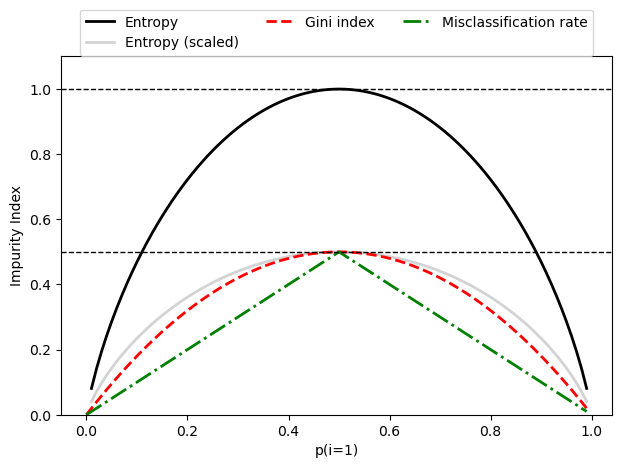

In [1]:
# Plot of the Gini index, the entropy, and the misclassification (error) rate.

import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]  # scaled entropy
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

# https://www.geeksforgeeks.org/zip-in-python/
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini index', 'Misclassification rate'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./impurity.png', dpi=300, bbox_inches='tight')
plt.show()

# Information gain <a id="information_gain"/>

**Information gain** is a quantitative measure of the value of using an attribute in a test, with the goal of producing more homogeneous groups as a result of testing on that attribute.

Henceforth, we assume that we use entropy as our measure of homogeneity.

Let $A$ be an attribute, $\mbox{values}(A)$ its possible values, and $S_{v}$ be the subset of $S$ for which $A$ has value $v$.

The information gain is defined to be
$$
  \mbox{gain}(S,A) = \mbox{entropy}(S) - \!\!\!\!\sum_{v \in \mbox{values}(S)} \frac{\abs{S_{v}}}{\abs{S}} \mbox{entropy}(S_{v}),
$$
where $\abs{\cdot}$ is the number of elements in a set.

The information gain is the expected reduction in entropy caused by knowing the value of the attribute $A$.

**When constructing a decision node with training samples $S$, we want to choose the attribute $A$ that maximizes the information gain.**


## Creating a decision tree

The following example refers to https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks%2F05.08-Random-Forests.ipynb

Consider the following two-dimensional data, which has one of four class labels:

In [2]:
%matplotlib inline  
# render any matplotlib diagrams even if the plt. show() function is not called

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# sns.set() will load seaborn's default theme and color palette to the session

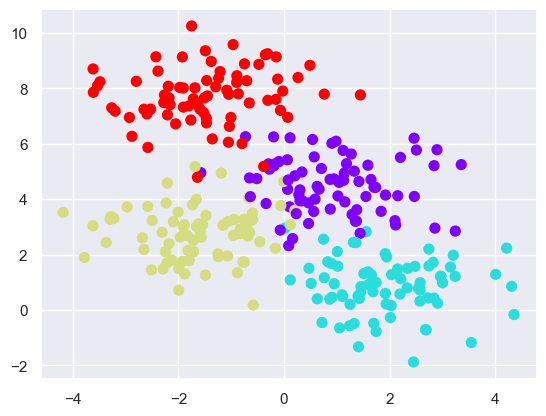

In [3]:
# make-blobs dataset: Generate isotropic Gaussian blobs for clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

Fitting a decision tree to the data using *DecisionTreeClassifier* in Scikit-Learn

In [4]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
tree = DT.fit(X, y)

The following function helps us visualize the output of the classifier:

In [5]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can examine what the decision tree classification looks like:

/var/folders/wp/t9z10fyn0c5cm_wcytbbdlyw0000gp/T/ipykernel_11356/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


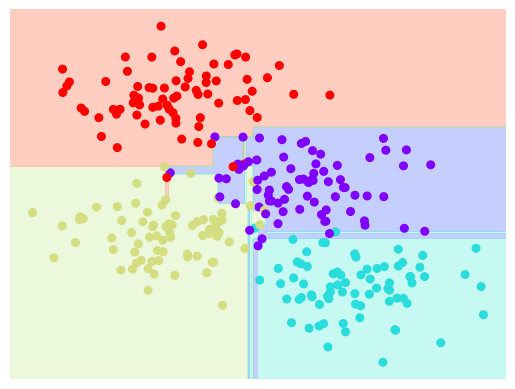

In [6]:
visualize_classifier(DT, X, y)

Import a python file named *helpers_05_08.py*, which is a helper's script to bring up an interactive visualization of the decision tree building process.

The *helpers_05_08.py* file is from: https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks%2F06.00-Figure-Code.ipynb

In [7]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

Question: Is there any problem in the trained DT model? Is it overfitting or underfitting?

### Overfitting or underfitting

Refers to https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

Overfitting and underfitting are two concepts in machine learning when we talk about how well a machine learning model learns and generalizes to new data.

Underfitting refers to a model that can neither model the training data nor generalize to new data. The model will have poor performance on both the training data and the test data.

Overfitting refers to a model that models the training data too well. It happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

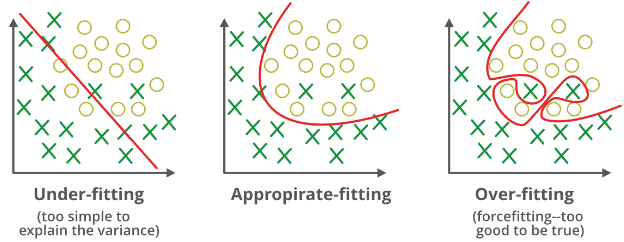

This figure refers to https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

## Decision tree classification on the iris dataset

The following example refers to https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/CART/Visualization/.ipynb_checkpoints/DecisionTreesVisualization-checkpoint.ipynb

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Load the Dataset**

The iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [9]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = dataset['data']
y = dataset['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Splitting Data into Training and Test Sets**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Make an instance of the Model**

In [11]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

**Training the model on the data, storing the information learned from the data**

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [12]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

**Predict the labels of new data (new flowers)**

Use the information the model learned during the model training process

In [13]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

**Measuring Model Performance**

In [14]:
score = clf.score(X_test, Y_test)
print(score)

0.9111111111111111


## How to Visualize Decision Trees using Matplotlib

Decision Trees can be plotted with matplotlib using scikit-learn's `tree.plot_tree`. 

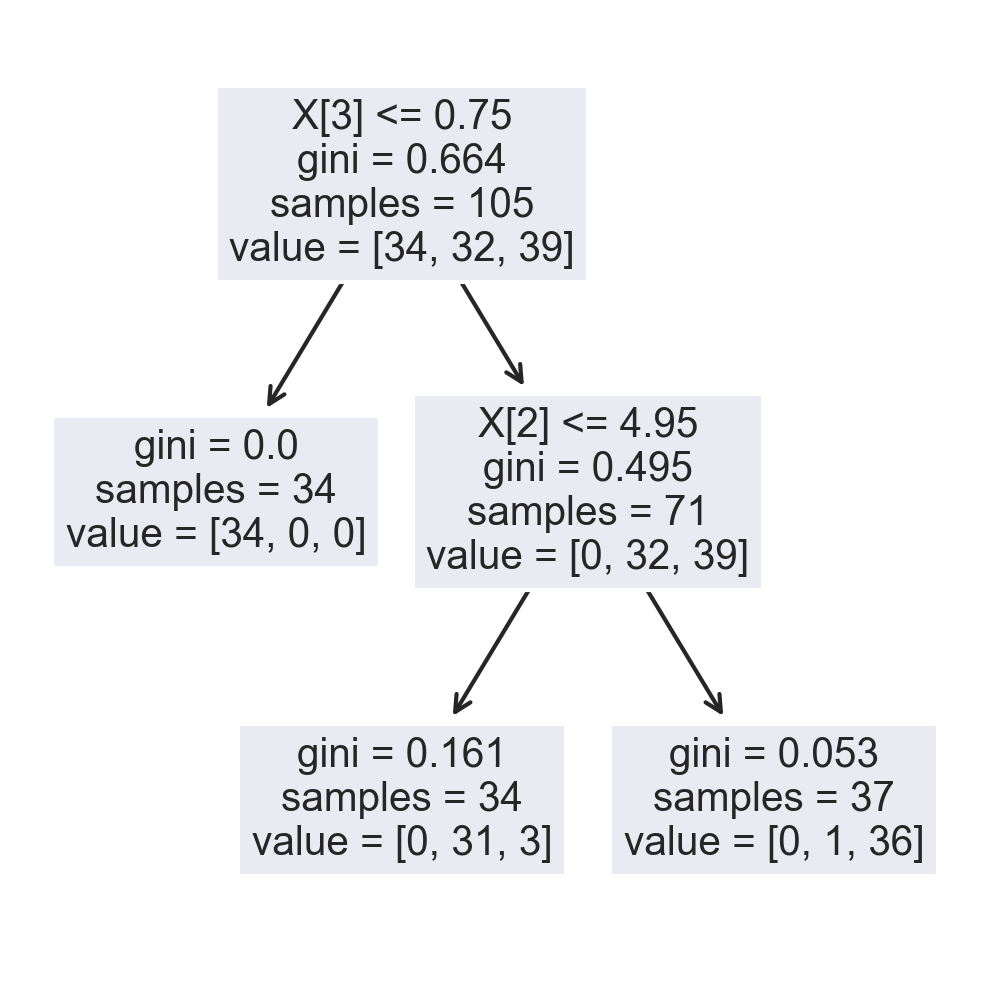

In [15]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf)
# fig.savefig('../images/plottreedefault.png')
plt.show()

In [16]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

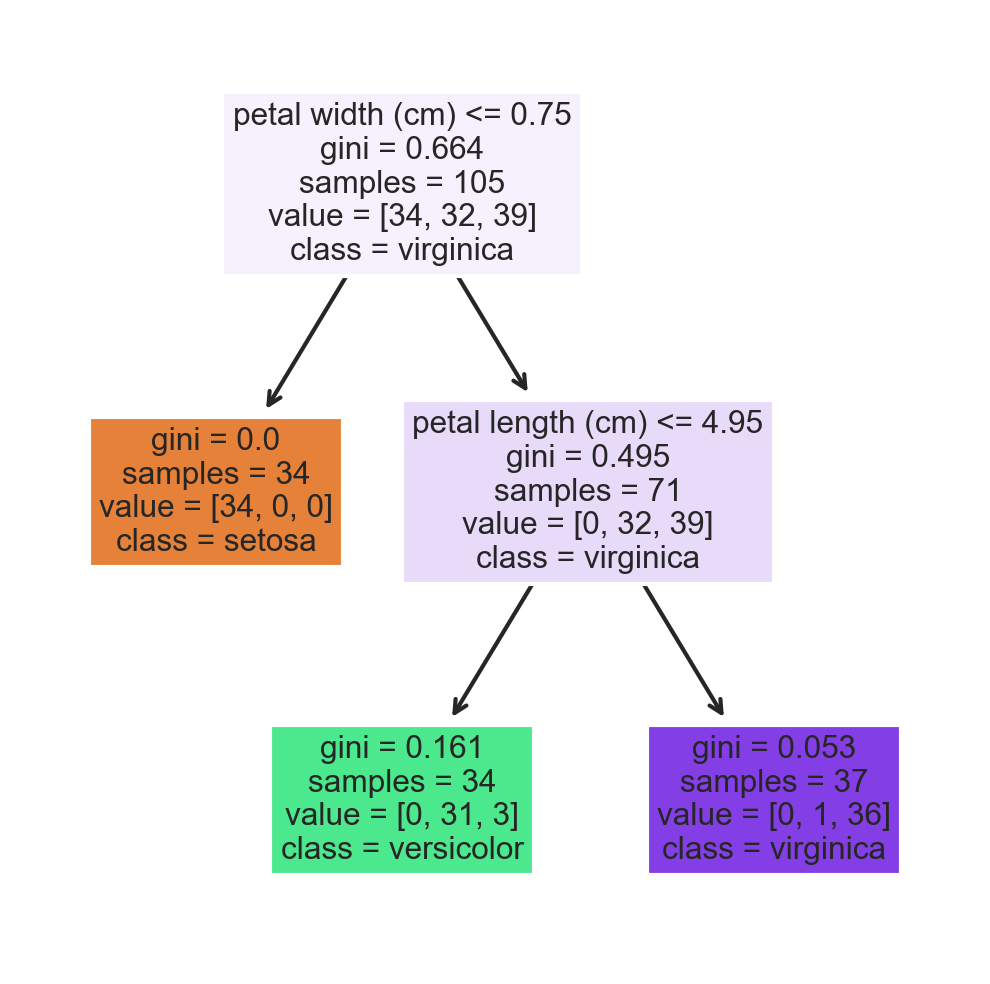

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
# fig.savefig('../images/plottreefncn.png')
plt.show()

How about when we set max_depth = 3 or max_depth = 4?